## import libraries

In [1]:
import os, glob
from PIL import Image
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## image resize

In [2]:
def image_resize():
    img_path = os.getenv("HOME") + "/aiffel_practice/rock_scissor_paper/"
    img_lst = ["scissor", "rock", "paper"]
    target_size = (28, 28)

    for i, val in enumerate(img_lst):
        imgs = glob.glob(img_path+ val +"/*.jpg")
        for img in imgs:
            old_img = Image.open(img)
            new_img = old_img.resize(target_size, Image.ANTIALIAS)
            new_img.save(img, "JPEG")

image_resize()

## load resized images

In [3]:
def load_data(img_path, num_data=300):
    img_size = 28
    channel = 3
    imgs = np.zeros(num_data * img_size * img_size * channel, dtype=np.int32)
    imgs = imgs.reshape(num_data, img_size, img_size, channel)
    labels = np.zeros(num_data, dtype=np.int32)
    
    img_lst = ["scissor", "rock", "paper"]
    target_size = (28, 28)
    label_idx = 0
    for i, val in enumerate(img_lst):
        imgs_path = glob.glob(img_path+ val +"/*.jpg")
        for img in imgs_path:
            img = np.array(Image.open(img), dtype=np.int32)
            imgs[label_idx, :, :, :] = img
            labels[label_idx] = i
            label_idx = label_idx + 1
    return imgs, labels

def img_normalize(imgs):
    return imgs/255.0

img_path = os.getenv("HOME") + "/aiffel_practice/rock_scissor_paper/rock_scissor_paper_1500/"
(x_train, y_train) = load_data(img_path, num_data=1500)
x_train_norm = img_normalize(x_train)

## visualize train images

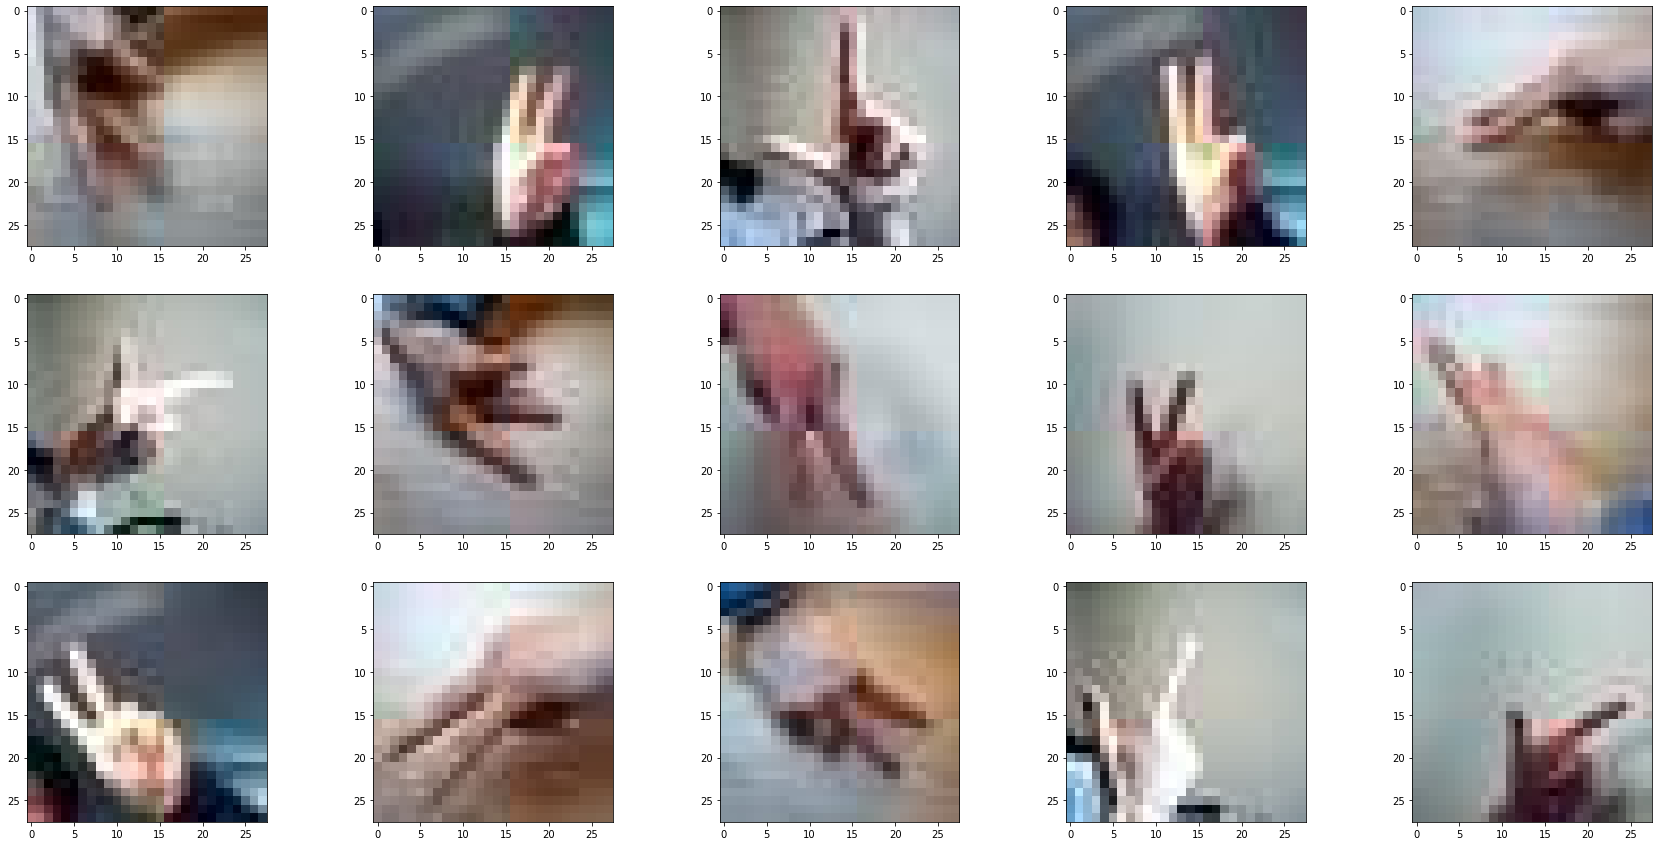

In [4]:
def visualize_imgs(imgs):
    plt.figure(figsize=(30, 15))
    x = list(map(int, np.linspace(0, 299, 15)))
    for i, val in enumerate(x):
        plt.subplot(3, 5, i+1)
        plt.imshow(imgs[val])

visualize_imgs(x_train_norm)

## design deep learning model

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

### learning model

In [6]:
model.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
model.fit(x_train_norm, y_train, epochs = 20)

Epoch 1/20
47/47 [==============================] - 4s 85ms/step - loss: 1.0778 - accuracy: 0.3913
Epoch 2/20
47/47 [==============================] - 0s 2ms/step - loss: 0.8847 - accuracy: 0.5747
Epoch 3/20
47/47 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7640
Epoch 4/20
47/47 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8500
Epoch 5/20
47/47 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.9073
Epoch 6/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1974 - accuracy: 0.9433
Epoch 7/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9553
Epoch 8/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9733
Epoch 9/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9913
Epoch 10/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9887
Epoch 11/20
47/47 

## load test data

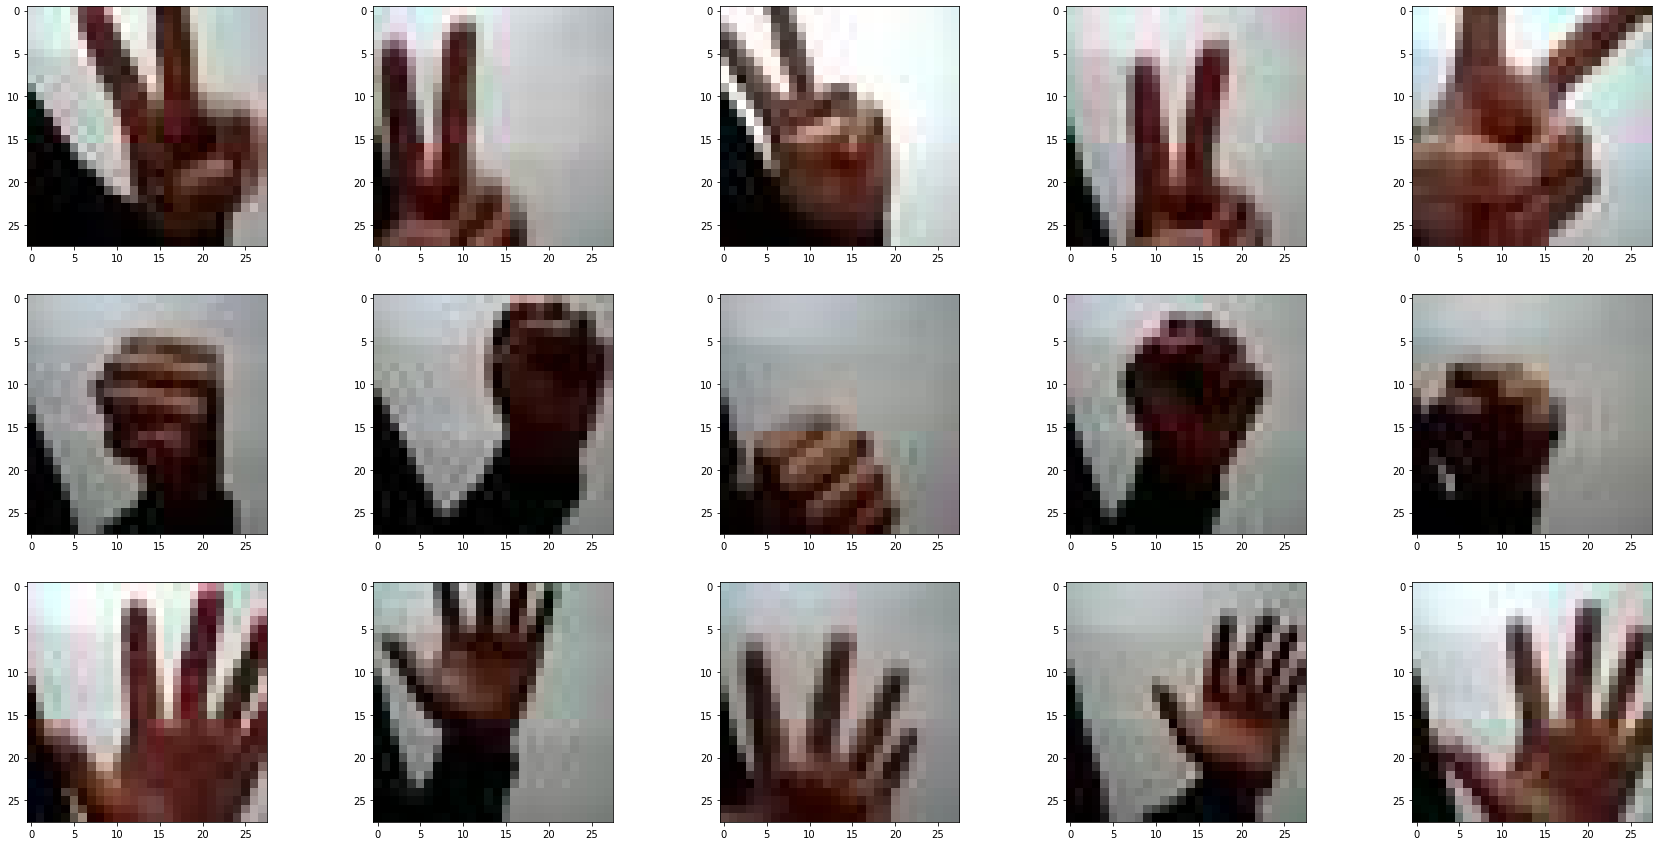

In [7]:
img_path = os.getenv("HOME") + "/aiffel_practice/rock_scissor_paper/"
(x_test, y_test) = load_data(img_path, num_data=300)
x_test_norm = img_normalize(x_test)

visualize_imgs(x_test_norm)

## model evaluation

In [8]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test loss : {}".format(test_loss))
print("test accuracy : {}".format(test_accuracy))

10/10 - 2s - loss: 3.1077 - accuracy: 0.6300
test loss : 3.1076812744140625
test accuracy : 0.6299999952316284
